https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

# Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Import data

In [74]:
type_table = {"Code": "int32", "Year": "int32", "Sales": "float32", "Bills": "int16"}
df_raw = pd.read_csv("sales_and_bills.csv", index_col=False)
# df_raw.info

      Code  Year        Sales  Bills
0      110  1999  16147961.00    180
1      110  2000  45873960.00    267
2      110  2001  40402180.00    214
3      110  2002    232776.31    218
4      110  2003    331355.00    316
...    ...   ...          ...    ...
9697  8871  2018      4069.24      4
9698  8871  2019      7874.48      2
9699  8871  2020      3694.29      1
9700  8871  2021      3879.01      1
9701  8871  2022      5077.61      3

[9702 rows x 4 columns]


# Some Visualizations

(array([8.461e+03, 6.850e+02, 2.700e+02, 1.050e+02, 6.700e+01, 2.500e+01,
        1.100e+01, 1.900e+01, 7.000e+00, 3.000e+00, 7.000e+00, 1.000e+00,
        8.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

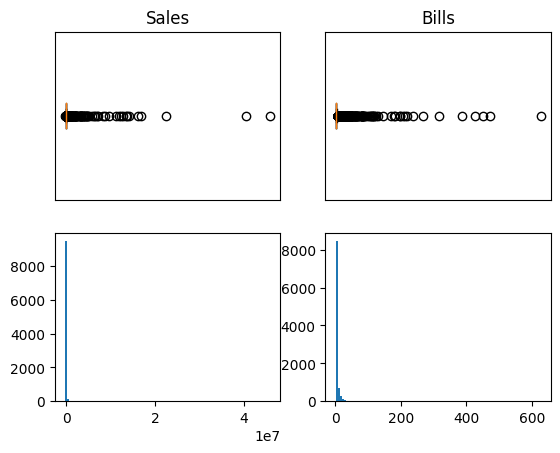

In [60]:
fig, axes = plt.subplots(2, 2)

# df_raw.boxplot(column='Sales', ax=axes[0, 0])
# df_raw.boxplot(column='Bills', ax=axes[0, 1])
axes[0, 0].boxplot(x=df_raw.Sales, vert=False, labels=[""])
axes[0, 0].set(title="Sales", xticklabels="", xticks=[], yticks=[])
axes[0, 1].boxplot(x=df_raw.Bills, vert=False, labels=[""])
axes[0, 1].set(title="Bills", xticklabels="", xticks=[], yticks=[])
axes[1, 0].hist(x=df_raw.Sales, bins=100)
axes[1, 1].hist(x=df_raw.Bills, bins=100)

# Tukey's IQR method

In [112]:
def iqr_outliers(df, features, n=1):
    """
    Takes a dataframe <df> and returns an index list corresponding to the observations
    containing more than or equal to <n> outliers in the listed <features>
    according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # calculate 1st quartile
        Q1 = np.percentile(df[column], 25)
        # calculate 3rd quartile
        Q3 = np.percentile(df[column], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR

        # outliers' indeces for a column
        outlier_list_column = df[
            (df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)
        ].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # count number of outliers for an index
    outlier_list = Counter(outlier_list)
    # filter indeces where number of outliers is not less than theshold
    multiple_outliers = list(k for k, v in outlier_list.items() if v >= n)

    # Calculate the number of outliers
    outliers = len(multiple_outliers)
    total = len(df.index)
    print(
        f"Outliers are {outliers} elements out of {total},  which is {outliers/total:.1%} of data."
    )

    return multiple_outliers


Outliers are 1623 elements out of 9702,  which is 16.7% of data.


(array([5.31e+03, 9.70e+02, 0.00e+00, 4.94e+02, 2.76e+02, 0.00e+00,
        1.76e+02, 0.00e+00, 1.33e+02, 8.80e+01, 0.00e+00, 7.00e+01,
        0.00e+00, 6.40e+01, 4.20e+01, 0.00e+00, 4.90e+01, 0.00e+00,
        1.27e+02, 7.00e+01, 0.00e+00, 5.00e+01, 3.00e+01, 0.00e+00,
        2.20e+01, 0.00e+00, 1.00e+01, 1.50e+01, 0.00e+00, 8.00e+00,
        0.00e+00, 7.00e+00, 1.50e+01, 0.00e+00, 7.00e+00, 0.00e+00,
        5.00e+00, 6.00e+00, 0.00e+00, 7.00e+00, 2.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 4.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

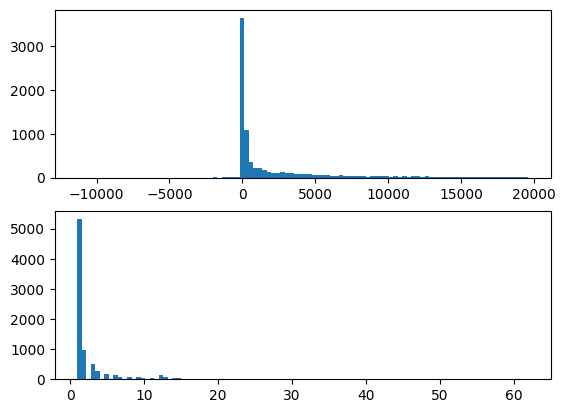

In [115]:
outliers_iqr = iqr_outliers(df_raw, ["Sales"], 1)

df_out = df_raw.drop(outliers_iqr, axis=0).reset_index(drop=True)

fig, axes = plt.subplots(2)
axes[0].hist(x=df_out.Sales, bins=100)
axes[1].hist(x=df_out.Bills, bins=100)

# Standard deviation method

In [117]:
def StDev_outliers(df, features, n=1, cutoff=3):
    """
    Takes a dataframe <df> and returns an index list corresponding to the observations
    containing more than or equal to <n> outliers in the listed <features>
    according to the standard deviation method. The cutoff value <cutoff> in St. deviations.
    """
    outlier_list = []

    for column in features:
        # calculate mean and standard deviation
        col_mean = df[column].mean()
        col_std = df[column].std()
        # calculate the cutoff value
        cut_off = col_std * cutoff

        # outliers' indices for a column
        outlier_list_column = df[
            (df[column] < col_mean - cut_off) | (df[column] > col_mean + cut_off)
        ].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # count number of outliers for an index
    outlier_list = Counter(outlier_list)
    # filter indeces where number of outliers is not less than threshold
    multiple_outliers = list(k for k, v in outlier_list.items() if v >= n)

    # Calculate the number of outliers
    outliers = len(multiple_outliers)
    total = len(df.index)
    print(
        f"Outliers are {outliers} elements out of {total},  which is {outliers/total:.1%} of data."
    )

    return multiple_outliers

Outliers are 76 elements out of 9702,  which is 0.8% of data.


(array([8.43e+03, 6.73e+02, 2.56e+02, 1.01e+02, 6.00e+01, 2.40e+01,
        1.10e+01, 1.80e+01, 7.00e+00, 3.00e+00, 6.00e+00, 1.00e+00,
        7.00e+00, 3.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 3.00e+00,
        2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

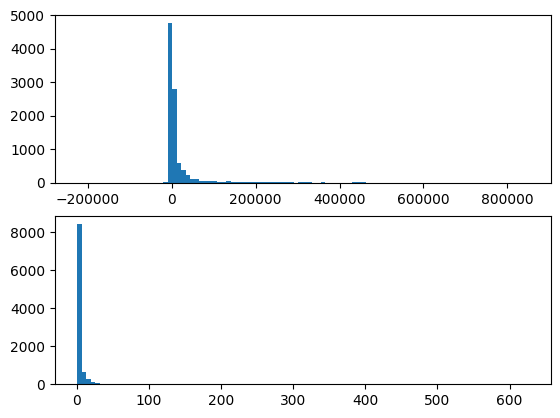

In [121]:
outliers_stdev = StDev_outliers(df_raw, ["Sales"], cutoff=1)

df_out = df_raw.drop(outliers_stdev, axis=0).reset_index(drop=True)

fig, axes = plt.subplots(2)
axes[0].hist(x=df_out.Sales, bins=100)
axes[1].hist(x=df_out.Bills, bins=100)


# Modified z-score

In [152]:
from scipy.stats import median_abs_deviation as MAD


def z_scoremod1_outliers(df, features, n=1, cutoff=3):
    """
    Takes a dataframe <df> and returns an index list corresponding to the observations
    containing more than or equal to <n> outliers in the listed <features>
    according to the z-score modified method.
    """
    outlier_list = []

    for column in features:
        # calculate the mean of the data
        col_mean = df[column].mean()

        # calculate z-score modified
        mod_z_score = abs(0.6745 * (df[column] - col_mean) / MAD(df[column]))
        # find the outliers' indices
        outlier_list_column = df[mod_z_score > cutoff].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # count number of outliers for an index
    outlier_list = Counter(outlier_list)
    # filter indeces where number of outliers is not less than threshold
    multiple_outliers = list(k for k, v in outlier_list.items() if v >= n)

    # Calculate the number of outliers
    outliers = len(multiple_outliers)
    total = len(df.index)
    print(
        f"Outliers are {outliers} elements out of {total},  which is {outliers/total:.1%} of data."
    )

    return multiple_outliers

Outliers are 9666 elements out of 9702,  which is 99.6% of data.


(array([7., 3., 3., 0., 4., 0., 5., 1., 3., 3., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([ 1.  ,  1.81,  2.62,  3.43,  4.24,  5.05,  5.86,  6.67,  7.48,
         8.29,  9.1 ,  9.91, 10.72, 11.53, 12.34, 13.15, 13.96, 14.77,
        15.58, 16.39, 17.2 , 18.01, 18.82, 19.63, 20.44, 21.25, 22.06,
        22.87, 23.68, 24.49, 25.3 , 26.11, 26.92, 27.73, 28.54, 29.35,
        30.16, 30.97, 31.78, 32.59, 33.4 , 34.21, 35.02, 35.83, 36.64,
        37.45, 38.26, 39.07, 39.88, 40.69, 41.5 , 42.31, 43.12, 43.93,
        44.74, 45.55, 46.36, 47.17, 47.98, 48.79, 49.6 , 50.41, 51.22,
        52.03, 52.84, 53.65, 54.46, 55.27, 56.08, 56.

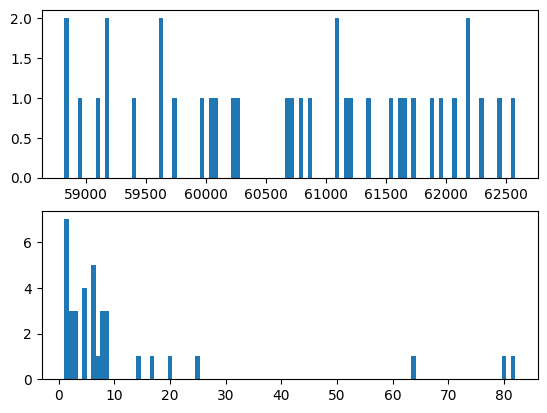

In [155]:
outliers_z_scoremod1 = z_scoremod1_outliers(df_raw, ["Sales"], cutoff=3)

df_out = df_raw.drop(outliers_z_scoremod1, axis=0).reset_index(drop=True)

fig, axes = plt.subplots(2)
axes[0].hist(x=df_out.Sales, bins=100)
axes[1].hist(x=df_out.Bills, bins=100)

# Isolation Forest

In [124]:
# pip install -U scikit-learn


In [139]:
from sklearn.ensemble import IsolationForest

df_iso = df_raw.copy()
df_iso = df_iso.drop(["Code", "Year"], axis=1)
df_iso.head()

,Sales,Bills
0,16147961.00,180
1,45873960.00,267
2,40402180.00,214
3,232776.31,218
4,331355.00,316


In [140]:
model = IsolationForest()
model.fit(df_iso)


IsolationForest()

In [141]:
scores = model.decision_function(df_iso)
anomaly = model.predict(df_iso)
df_iso["scores"] = scores
df_iso["anomaly"] = anomaly
df_iso.head(10)

,Sales,Bills,scores,anomaly
0,16147961.00,180,-0.365790,-1
1,45873960.00,267,-0.369312,-1
2,40402180.00,214,-0.369312,-1
3,232776.31,218,-0.303150,-1
4,331355.00,316,-0.319064,-1
5,431159.00,473,-0.325741,-1
6,145200.55,385,-0.305871,-1
7,117863.85,425,-0.304237,-1
8,182703.30,626,-0.309150,-1
9,119326.52,450,-0.303693,-1


In [147]:
outliers_list = df_iso.loc[df_iso["anomaly"] == -1].index
outliers = len(outliers_list)
total = len(df_iso.index)
print(
    f"Outliers are {outliers} elements out of {total},  which is {outliers/total:.1%} of data."
)

Outliers are 958 elements out of 9702,  which is 9.9% of data.


(array([5515.,    0.,    0.,    0.,    0.,    0.,    0., 1107.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  608.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  367.,    0.,    0.,    0.,
           0.,    0.,    0.,  249.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  188.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  133.,    0.,    0.,    0.,    0.,    0.,    0.,  101.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,   83.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   50.,    0.,    0.,
           0.,    0.,    0.,    0.,   66.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  138.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   87.,    0.,    0.,    0.,    0.,    0.,    0.,
          52.]),
 array([ 1.  ,  1.13,  1.26,  1.39,  1.52,  1.65,  1.78,  1.91,  2.04,
         2.17,  2.3 ,  2.43,  2.56,  2.69,  2.82,  2.95,  3.08,  3.21,
         3.34,  3.47,  3.6 ,  3.73,  3.86,  3.99,  4.12,  4.

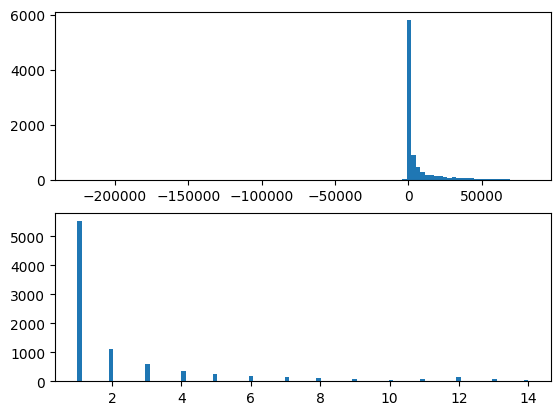

In [151]:
df_out = df_iso.drop(outliers_list, axis=0).reset_index(drop=True)

fig, axes = plt.subplots(2)
axes[0].hist(x=df_out.Sales, bins=100)
axes[1].hist(x=df_out.Bills, bins=100)


# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [156]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df_dbscan = df_raw.copy()
df_dbscan = df_dbscan.drop(["Code", "Year"], axis=1)
df_dbscan.head()

,Sales,Bills
0,16147961.00,180
1,45873960.00,267
2,40402180.00,214
3,232776.31,218
4,331355.00,316


In [167]:
X = StandardScaler().fit_transform(df_dbscan.values)
df_db_raw = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = df_db_raw.labels_
pd.Series(labels).value_counts()

 0    9608
-1      82
 1      12
dtype: int64